# Dataset 
## Sensor Datasets with Feature Extraction
Sensor datasets, recorded by various sensors detecting environmental changes, are crucial for real-time monitoring, decision-making, predictive analysis, and automation.

##### Types of Sensors
*Temperature Sensors*: Measure temperature.
*Pressure Sensors*: Detect pressure variations.
*Accelerometers and Gyroscopes*: Measure acceleration and orientation.
*Proximity and Light Sensors*: Detect object presence and light intensity.
*Sound Sensors*: Capture audio signals.
*Chemical Sensors*: Monitor environmental changes.
*GPS Sensors*: Provide location data.
**_Data is not only collected from temperature sensors, but also from other types of sensors that gather information such as text, video, audio, and various environmental parameters._**

![Data can exist in any form: text, audio, video, and images](IntroductionImages/TextVideoImageSpeech.JPG)

Data can exist in any form: text, audio, video, and images

## Feature Extraction
Sensor datasets often contain diverse information collected from various types of sensors.Feature extraction transforms raw sensor data into representative features for analysis, improving data interpretation and prepare for machine learning algorithm.
_For example_, in the following figure, the activity signal introduced in the above section is converted into a feature vector including mean, variance, skewness, and other features.

![Activity signal converted into a feature vector (mean, variance, skewness, etc.](IntroductionImages/Activity_Feature.jpg)

Activity signal converted into a feature vector (mean, variance, skewness, etc.

### Some Examples of Feature extraction

#### Feature Extraction from Text: 
Feature extraction from text involves converting text data into numerical representations that can be used for machine learning models. One common method is using the Term Frequency-Inverse Document Frequency (TF-IDF) approach.

Here’s a simple explanation and Python code to perform TF-IDF feature extraction:

#### Concepts:
*Document*: A piece of text. *Corpus*: A collection of documents. *Term Frequency (TF)*: The frequency of a term 𝑡 in a document 𝑑. *Inverse Document Frequency (IDF)*: Measures how important a term is in the entire corpus.
The TF-IDF value increases with the number of times a term appears in a document but is offset by the frequency of the term in the corpus, to adjust for the fact that some words are generally more common than others.

**Steps to Compute TF-IDF:**
1-Calculate the Term Frequency (TF) for each term in each document.
2-Calculate the Inverse Document Frequency (IDF) for each term.
3-Multiply the TF and IDF values to get the TF-IDF score for each term in each document.

##### TF-IDF Formula
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic intended to reflect how important a word is to a document in a collection or corpus.

##### Term Frequency (TF)
The term frequency TF(t,d) is the frequency of term t  in document  d.

$$
\text{TF}(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$

#### Inverse Document Frequency (IDF)

The inverse document frequency IDF(t,D)  measures how important a term is across the entire corpus D .

$$
\text{IDF}(t,D) = \log \left( \frac{N}{|\{d \in D : t \in d\}|} \right)
$$

$$N\left(x_i, \mu_c, \Sigma_c\right)=\frac{1}{(2 \pi)^{\frac{n}{2}}\left|\Sigma_c\right|^{\frac{1}{2}}} \exp \left(-\frac{1}{2}\left(x_i-\mu_c\right)^T \Sigma_c^{-1}\left(x_i-\mu_c\right)\right)$$

Where:
-  N is the total number of documents in the corpus. Denumerator is the number of documents where the term  t appears (i.e., the document frequency of the term).

#### TF-IDF Score
The TF-IDF score for a term  t  in a document d is the product of its TF and IDF values.

$$
\text{TF-IDF}(t,d,D) = \text{TF}(t,d) \times \text{IDF}(t,D)
$$

This formula adjusts the term frequency of a word by how rarely it appears in the entire corpus, emphasizing words that are more unique to specific documents.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "If you love God, follow God so that",
    "He may also love you and forgive your sins, ",
    "for He is Forgiving and Merciful.",
    "God has given Him another creation, meaning we have given Him a soul,",
    "and 'I have breathed into him of My spirit.'",
    "Those who have faith have a greater love for God.",
    "I have hastened towards You, my Lord, to seek Your pleasure.",
    "Although interpretation in words is clearer,",
     "love without words is brighter."
    ]

# Create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the documents to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense format and print it
tfidf_dense = tfidf_matrix.todense()
print("TF-IDF Matrix:\n", tfidf_dense)

# Print the feature names
print("\nFeature Names:\n", feature_names)

TF-IDF Matrix:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.37483157 0.         0.
  0.         0.         0.55052949 0.         0.         0.
  0.         0.         0.         0.37483157 0.         0.
  0.         0.         0.         0.24321139 0.         0.
  0.         0.         0.         0.         0.         0.
  0.37483157 0.         0.         0.37483157 0.         0.
  0.         0.         0.         0.         0.         0.27526475
  0.        ]
 [0.37996836 0.         0.27903704 0.         0.         0.
  0.         0.         0.         0.         0.         0.37996836
  0.         0.         0.         0.         0.         0.
  0.         0.32092732 0.         0.         0.         0.
  0.         0.         0.         0.24654442 0.37996836 0.
  0.         0.         0.         0.         0.         0.37996836
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         

**_The point here is that different words like conjunctions and verbs with various tenses are considered as part of the words. such as 'and' 'has' 'have' 'forgive' 'forgiving'_**

### solve this problem

To address the issue of different forms of words (like conjunctions, verbs in various tenses, etc.) being treated as separate terms, we can use techniques such as lemmatization and removing stopwords. Lemmatization reduces words to their base or root form, and removing stopwords eliminates common words that are typically not useful for feature extraction.

Here’s a Python code example using nltk and sklearn to perform these preprocessing steps before applying TF-IDF:
```python
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Sample documents
documents = [
    "If you love God, follow God so that",
    "He may also love you and forgive your sins, ",
    "for He is Forgiving and Merciful.",
    "God has given Him another creation, meaning we have given Him a soul,",
    "and 'I have breathed into him of My spirit.'",
    "Those who have faith have a greater love for God.",
    "I have hastened towards You, my Lord, to seek Your pleasure.",
    "Although interpretation in words is clearer,",
     "love without words is brighter."
    ]
# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize and remove stopwords
    processed_tokens = [
        lemmatizer.lemmatize(token.lower(), pos='v')  # Specify pos='v' for verbs
        for token in tokens if token.lower() not in stop_words and token.isalnum()
    ]
    
    # Join tokens back to string
    return ' '.join(processed_tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed documents to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense format and print it
tfidf_dense = tfidf_matrix.todense()

# Print the feature names
print("\nFeature Names:\n", feature_names)
```

### Output is:
Feature Names:
 ['also' 'although' 'another' 'breathe' 'brighter' 'clearer' 'creation'
 'faith' 'follow' 'forgive' 'give' 'god' 'greater' 'hasten'
 'interpretation' 'lord' 'love' 'may' 'mean' 'merciful' 'pleasure' 'seek'
 'sin' 'soul' 'spirit' 'towards' 'without' 'word']


#### Feature Extraction from Image: 

**_Feature extraction_** from images involves transforming raw image data into a set of representative features that can be used for analysis or machine learning tasks. Some of its stages include:

1. **Preprocessing**
   Before extracting features, it's often necessary to preprocess the images to standardize them and remove noise. Common preprocessing steps include resizing, cropping, normalization, and noise reduction.
2. **Feature Extraction Techniques**
   There are various techniques for extracting features from images. Some popular methods include:

- _Histogram of Oriented Gradients ([HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients))_
  HOG computes the distribution of gradient orientations in localized portions of an image. It's commonly used for object detection and recognition tasks.
- _Scale-Invariant Feature Transform ([SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform))_
  SIFT detects and describes local features in an image that are invariant to scale, rotation, and illumination changes. It's widely used in image matching and object recognition.
- Convolutional Neural Networks ([CNNs](https://en.wikipedia.org/wiki/Convolutional_neural_network))
  CNNs are deep learning models that automatically learn hierarchical features from images. They consist of convolutional layers that extract features at different levels of abstraction.

3. **Feature Representation**
   Once features are extracted, they need to be represented in a suitable format for analysis or machine learning algorithms. This could involve reshaping them into vectors or matrices.
4. **Application**
   Extracted features can be used for various tasks such as image classification, object detection, image retrieval, and content-based image retrieval.

**Python Libraries for Image Feature Extraction**
Popular Python *libraries for image feature extraction* include `OpenCV, scikit-image, and TensorFlow`.

Here's a simple example using scikit-image to extract HOG features from an image:

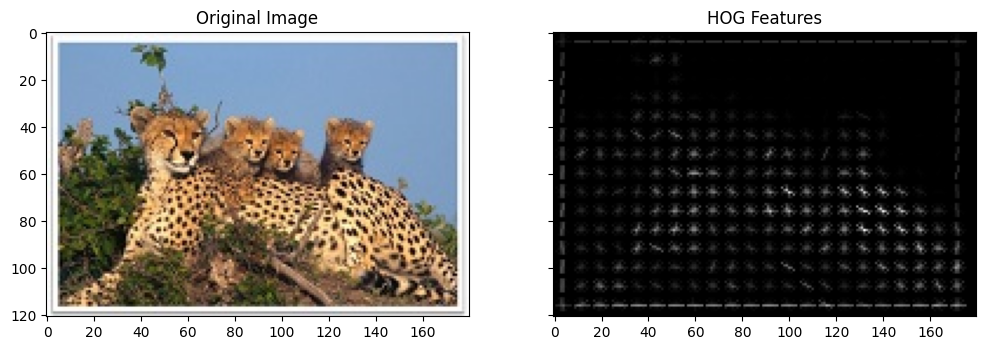

In [13]:
from skimage.feature import hog

from skimage import io, color

import matplotlib.pyplot as plt

# Load an example image

image = io.imread('IntroductionImages/Cheetah.jpg')

# Convert the image to grayscale

image_gray = color.rgb2gray(image)

# Extract HOG features

features, hog_image = hog(image_gray, visualize=True)

# Display the original image and HOG features

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)

ax[0].set_title('Original Image')

ax[1].imshow(hog_image, cmap=plt.cm.gray)

ax[1].set_title('HOG Features')

plt.show()

This code loads an example image, converts it to grayscale, and extracts HOG features. It then displays the original image alongside the HOG features

Another feature from image is histogram. The normalized histogram provides a probability distribution of pixel intensities in the grayscale image, highlighting the frequency of each intensity value across the entire image. following figure is Histogram of above cheetah.jpg

Another feature extracted from the image is the ***histogram***. The normalized histogram provides a probability distribution of pixel intensities in the grayscale image, illustrating how frequently each intensity value occurs throughout the image. The x-axis represents the pixel intensity values, ranging from 0 (black) to 1 (white), while the y-axis shows the normalized frequency of each intensity value. To obtain a histogram of the image, the following code can be added:.

```python 
import numpy as np
hist, bins = np.histogram(image_gray, bins=256, range=(0, 1))

# Normalize the histogram
hist_normalized = hist / hist.sum()
```

The following figure shows the normalized histogram for the image 'cheetah.jpg'.

![Histogram of Image](IntroductionImages/Histogram_Feature.JPG)

Interpreting the histogram can provide insights into the image's composition. Peaks in the histogram correspond to intensity values that occur frequently. In an image with a distinct target (like the cheetah) and background, the histogram might show two or more peaks. One peak could represent the intensity values of the target (cheetah), while another could represent the background (e.g., grass, sky). By analyzing these peaks, we can distinguish between different regions of the image. 

We can add code to detect **corners** in an image using the Harris Corner Detection method from the OpenCV library. This feature extraction technique identifies points in the image where the intensity changes significantly in multiple directions, which typically corresponds to corners. Main change of code:
```python
import cv2
# Detect corners using Harris Corner Detection
image_gray_cv2 = (image_gray * 255).astype(np.uint8)  # Convert to uint8 for OpenCV
corners = cv2.cornerHarris(image_gray_cv2, blockSize=2, ksize=3, k=0.04)
corners_dilated = cv2.dilate(corners, None)  # Dilate to mark the corners
image_with_corners = np.copy(image)
image_with_corners[corners_dilated > 0.01 * corners_dilated.max()] = [255, 0, 0]  # Mark corners in red
```

![Corner](IntroductionImages/CornerFaeture.JPG)

[Return to Intro. of PR](..//Introduction/Introduction_1.ipynb#Table-of-Introduction-in-PR)
